1.) (5/5 points) Pick some data suitable for regression learning that we haven't already used for this class. In your write-up briefly summarize the data set including the predictive columns and the target column(s). Briefly describe any data preparation you performed (and say why you did it).

The dataset that I picked for this experiment is something related to a game called DoTA2. DoTA2 is a massively multiplayer online role playing game(MMORPG). During the game, 10 players are split into two teams of five and the main objective of the game is to defend your base and the same time take down the enemy's base. Each player is represented by a hero, or "champion", to carry out the objective. During the game, players can have various of methods to collect gold, or money, so that along the way they can purchase upgrades that boost their heroes. For example, every one minute mark there will be a wave of smaller unit, or soldiers, that will march out both bases and help their heores on their objective, respectively. So, hero that killed these units will get an amount of gold, and this is called last hit. The more last hit a hero gets, the more gold it will earn (more units killed = more gold). Players can also collect gold from killing another hero unit or destroying a building that is defending the enemy base. Therefore, at the end of the game, the system will calculate the gold that a hero unit earned during the game per minute. We called it gold per minute(GPM). Currently in the game, there are 113 unique hero units that players can choose from. One of the hero is called Anti-Mage, and it is one of the most picked heros in the game. So, my experiment here is to predict the GPM for Anti-Mage based on some given attributes. 

First, the dataset has about 9000 samples and it will take too long to run the whole dataset. So, I used the same technique that I used in the Classification Experiment to reduce the dataset down to only 400 samples. The target column and predictive columns are listed below:

Target column:
1. gold_per_min - average gold collect per min of the total length of game

Predictive columns:
1. gold_spend - total gold spend on the hero 
2. xp_per_min - total experience gain per min of the total length of game
3. kills - total number of kills that Anti-Mage got from other enemy heroes in a single game
4. deaths - total number of death that Anti-Mage has in a single game
5. assists - total number of assist Anti-Mage got from a single game
6. last_hits - total number of units killed by Anti-Mage in a single game

In the predictive column, I think that there is a very important variable that we players looked at and also have a strong relationship to GPM is the ratio of kills, deaths, and assists, which is called KDA ratio. The ratio formula is (kills + assists)/(deaths + 1). So, before I start my experiment I will add another KDA column to the dataset. 

Source: https://www.kaggle.com/devinanzelmo/dota-2-matches

2.) (6/6 points) Using the scikit-learn SGDRegressor algorithm, perform an experiment to determine how well the classifier works on your data set. In your write-up, discuss the results. You will need to convince me that you have selected appropriate parameters for learning (e.g., learning rate, number of epochs). You will probably need to include a plot (or plots) of some sort to demonstrate this. Any data points you include should be averages over several runs with different training/testing splits to ensure that the results aren't simply due to luck.

[1.678017471771579e+35, 7.0217840271749435e+34, 3.9136670156246406e+34, 2.5655243400599017e+34, 1.4740190423480585e+34, 9.4944080281651258e+33, 4.6324322640479407e+33, 2.6472759110249771e+33, 9.518423736133702e+32, 1.8080057294505873e+33, 1.3556994227209349e+33, 9.3660109220967763e+32, 4.332220986519442e+32]


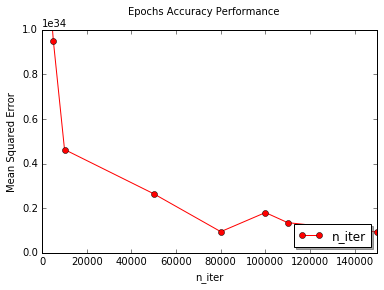

In [5]:
import sklearn
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

dota_data = pandas.read_csv('dota2_stats.csv')

dota_data['KDA'] = (dota_data['kills'] + dota_data['assists']) / (dota_data['deaths'] + 1)
predictors = ["gold_spent","xp_per_min","kills","deaths","assists","last_hits","KDA"]

accuracy_array = []

for i in [10,50,100,500,1000,5000,10000,50000,80000,100000,110000,150000,1000000]:
    sgd = SGDRegressor(n_iter=i)
    
    sum = 0
    count = 0
    for i in range(0,20):
        (train_data,test_data) = cv.train_test_split(dota_data,test_size=0.2)
        sgd.fit(train_data[predictors],train_data['gold_per_min'])
        dota_prediction = sgd.predict(test_data[predictors])
        sum += mean_squared_error(test_data['gold_per_min'],dota_prediction)
        count += 1
    
    average_accuracy = sum / count
    accuracy_array.append(average_accuracy)
print(accuracy_array)

%matplotlib inline
x_values = [10,50,100,500,1000,5000,10000,50000,80000,100000,110000,150000,1000000]

plt.suptitle('Epochs Accuracy Performance')
plt.xlabel('n_iter')
plt.ylabel('Mean Squared Error')
plt.plot(x_values,accuracy_array,'ro-',label='n_iter')
plt.legend(loc='lower right',shadow=True)
plt.axis([0,150000,1e+30,1e+34])
plt.show()

Here, I have also used the same method to calculate the accuracy performance as the classification experiment (looping through 20 times and get the average of the acuuracies). When calculating the accuracies, I am using mean squared error to calculate it and from the result above it seems like the larget the epochs, the lower the mean squared error which is what I wanted. So, the epochs that produces the lowest mean squared error is 1000000, and I would like to run more epochs but the above algorithm already took me 30 minutes to do so. Therefore, I would just choose 1000000 as my n_iter value. Next, I am going to test out the eta0 value that provides the lowest mean squared error.

[2.823611164009047e+39, 2.8097279457376503e+37, 1.6326486599874593e+35, 4.3413250650842411e+33, 2.0773969735526604e+31, 1.2612208509164108e+29, 2.5881824233898557e+27, 1.6713755117813694e+25, 54106925.768257067, 19045.203589622735, 18678.035438268445, 33621.663386745939]


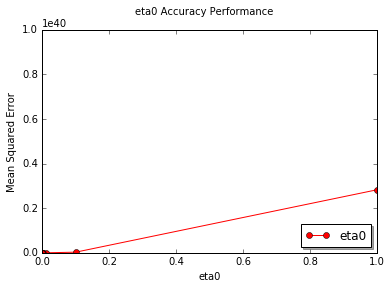

In [7]:
accuracy_array_2 = []

for i in [1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001,0.0000000001,0.00000000001]:
    sgd = SGDRegressor(eta0=i)
    
    sum = 0
    count = 0
    for i in range(0,20):
        (train_data,test_data) = cv.train_test_split(dota_data,test_size=0.2)
        sgd.fit(train_data[predictors],train_data['gold_per_min'])
        dota_prediction = sgd.predict(test_data[predictors])
        sum += mean_squared_error(test_data['gold_per_min'],dota_prediction)
        count += 1
    
    average_accuracy = sum / count
    accuracy_array_2.append(average_accuracy)
print(accuracy_array_2)

%matplotlib inline
x_values = [1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001,0.0000000001,0.00000000001]

plt.suptitle('eta0 Accuracy Performance')
plt.xlabel('eta0')
plt.ylabel('Mean Squared Error')
plt.plot(x_values,accuracy_array_2,'ro-',label='eta0')
plt.legend(loc='lower right',shadow=True)
plt.axis([0.00000000001,1,0,1e+40])
plt.show()

For this part I am also using mean squared error, and from the results above, the eta0 value that provides the lowest mean squared error is 0.0000000001. So, I am using n_iter = 1000000 and eta0 = 0.0000000001 to continues the experiment. 

In [44]:
import math
sgd = SGDRegressor(eta0=0.0000000001,n_iter=1000000)

sum = 0
count = 0
for i in range(0,20):
    (train_data,test_data) = cv.train_test_split(dota_data,test_size=0.2)
    sgd.fit(train_data[predictors],train_data['gold_per_min'])
    dota_prediction = sgd.predict(test_data[predictors])
    sum += mean_squared_error(test_data['gold_per_min'],dota_prediction)
    count += 1
    
average_accuracy = sum / count
print(average_accuracy)
print(math.sqrt(average_accuracy))

3220.34303098
56.7480663193441


The mean squared error by using SGDRegressor algorithm is 3220.3430 and after square rooting it it, the mean squared error is 56.7481. The mean squared error I believe would go down even further if I use a larger n_iter.

3.) (6/6 points) Using a scikit-learn implementation of another regressor algorithm (e.g., k-Nearest-Neighbor, Random Forest, or Multilayer Perceptron), perform an experiment to determine how well the regressor works on your data set. In your write-up, discuss the results. You will need to convince me that you have selected appropriate parameters for learning (e.g., the number of neighbors, number of trees, etc.). You will probably need to include a plot (or plots) of some sort to demonstrate this. Any data points you include should be averages over several runs with different training/testing splits to ensure that the results aren't simply due to luck.

Here, I am using k-NN algoritm. I will first get the best n_neighbors value and then test out whether wk-NN perform better than k-NN

[7121.1819999999989, 6783.7223562499985, 7235.014636111111, 7733.5555834999996, 8277.8323660714268, 8179.0950536250002, 9904.8902326388888, 11680.238398999998, 12649.013156984372, 16422.621513939997, 23426.644418277781]


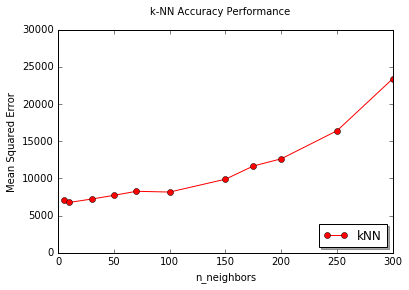

In [47]:
from sklearn.neighbors import KNeighborsRegressor

kNN_array = []

for i in [5,10,30,50,70,100,150,175,200,250,300]:
    kNN = KNeighborsRegressor(n_neighbors=i)
    
    sum = 0
    count = 0
    for i in range(0,20):
        (train_data,test_data) = cv.train_test_split(dota_data,test_size=0.2)
        kNN.fit(train_data[predictors],train_data['gold_per_min'])
        kNN_prediction = kNN.predict(test_data[predictors])
        sum += mean_squared_error(test_data['gold_per_min'],kNN_prediction)
        count += 1
        
    average_accuracy = sum / count
    kNN_array.append(average_accuracy)
print(kNN_array)

%matplotlib inline
x_values = [5,10,30,50,70,100,150,175,200,250,300]

plt.suptitle('k-NN Accuracy Performance')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error')
plt.plot(x_values,kNN_array,'ro-',label='kNN')
plt.legend(loc='lower right',shadow=True)
plt.axis([0,300,0,30000])
plt.show()

From the above result, mean squared error increases as n_neighbors increases. This is not surprising because the k-NN regressor algorithm will look at more and more neighbors and that will distort the decision making and cause the prediction of be inaccurate. Therefore, it is better to choose a lower n_neighbors value which in this case equals to 10. Next, I will test whether wk-NN performs better with this dataset.

In [2]:
wkNN_array = []

for i in [5,10,30,50,70,100,150,175,200,250,300]:
    wkNN = KNeighborsRegressor(weights='distance',n_neighbors=i)
    
    sum = 0
    count = 0
    for i in range(0,20):
        (train_data,test_data) = cv.train_test_split(dota_data,test_size=0.2)
        wkNN.fit(train_data[predictors],train_data['gold_per_min'])
        wkNN_prediction = wkNN.predict(test_data[predictors])
        sum += mean_squared_error(test_data['gold_per_min'],wkNN_prediction)
        count += 1
        
    average_accuracy = sum / count
    wkNN_array.append(average_accuracy)
print(wkNN_array)

%matplotlib inline
x_values = [5,10,30,50,70,100,150,175,200,250,300]

plt.suptitle('wk-NN Accuracy Performance')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error')
plt.plot(x_values,wkNN_array,'ro-',label='wkNN')
plt.plot(x_values,kNN_array,'bs-',label='kNN')
plt.legend(loc='lower right',shadow=True)
plt.axis([0,300,0,30000])
plt.show()

NameError: name 'KNeighborsRegressor' is not defined

The mean squared errors from wk-NN algorithm are generally lower than k-NN algorithm from the above result. This is because for wk-NN, the nearer the neighbors, the more weight they will be given compare to the neighbors further away. Therefore, I have chose to use wk-NN algorithm and with n_neighbors of 10 to perform this experiment.

In [50]:
wkNN = KNeighborsRegressor(weights='distance',n_neighbors=10)

sum = 0
count = 0
for i in range(0,20):
    (train_data,test_data) = cv.train_test_split(dota_data,test_size=0.2)
    wkNN.fit(train_data[predictors],train_data['gold_per_min'])
    wkNN_prediction = wkNN.predict(test_data[predictors])
    sum += mean_squared_error(test_data['gold_per_min'],wkNN_prediction)
    count += 1
    
average_accuracy = sum / count
print(average_accuracy)
print(math.sqrt(average_accuracy))

6709.95885413
81.91433851366466


4.) (3/3 points) Discuss conclusions in your write-up. Which algorithm performed better? Give reasons why you think that's the case.

From the two algoritms above, clearly the SGDRegressor outperformed the wk-NN Regressor. With an error of 56.75, it is only a little off the original GPM and compared to 81.91 which is way off the original GPM. SGDRegressor would have performed even better if a larger n_iter value was provided and have a much larger dataset to work with. It will take me a very long time to run the full dataset set, so I am forced to work with a smaller dataset, but the accuracy provided is not that bad at all and is within an acceptable range. Neighbors-based regression does not work well here mainly because my data labels are discrete variables rather than continuous variables (ref:http://scikit-learn.org/stable/modules/neighbors.html#regression). Another reasons that SGDRegressor works well for this experiement is bacause all my predictive columns are numerical in value and even my target column is numerical in value (which is why a regressor algorithm is used here instead of a classifier). 